# Estimación


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

In [4]:

data=pd.read_csv(r".\ag_Datos_hist_USD_COP.csv")
data
data["Último"]=data["Último"].str.replace(",","")
data["Apertura"]=data["Apertura"].str.replace(",","")
data[["Último","Apertura"]]=data[["Último","Apertura"]].apply(pd.to_numeric)
data["Medio"]=np.mean(data[["Apertura","Último"]].values,axis=1)
data.shape

[*********************100%%**********************]  1 of 1 completed


,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,08.11.2023,"4.086,90","4.012,33","4.088,88","4.012,33",NaN,"1,86%"
1,07.11.2023,"4.012,33","3.979,00","4.015,50","3.973,31",NaN,"0,86%"
2,06.11.2023,"3.978,00","3.978,00","3.982,00","3.977,05",NaN,"-0,15%"
3,03.11.2023,"3.983,87","4.022,30","4.022,30","3.953,12",NaN,"-0,96%"
4,02.11.2023,"4.022,50","4.091,89","4.093,59","4.015,95",NaN,"-1,35%"
...,...,...,...,...,...,...,...
62,14.08.2023,"4.040,00","3.963,75","4.049,00","3.962,32",NaN,"1,70%"
63,11.08.2023,"3.972,50","3.951,03","3.988,05","3.927,95",NaN,"0,28%"
64,10.08.2023,"3.961,50","4.018,23","4.026,43","3.937,12",NaN,"-1,39%"
65,09.08.2023,"4.017,50","4.076,22","4.080,00","3.996,19",NaN,"-1,48%"


In [14]:
yf.pdr_override()
inicio=datetime(2020,1,1)
fin=datetime(2022,11,12)
data=pdr.get_data_yahoo("COP=X",inicio,fin)
data["Avg"]=np.mean(data[["High","Low"]].values,axis=1)

[*********************100%%**********************]  1 of 1 completed


In [15]:
data

,Open,High,Low,Close,Adj Close,Volume,Avg
Date,,,,,,,
2020-01-01,3279.760010,3279.760010,3279.760010,3279.760010,3279.760010,0,3279.760010
2020-01-02,3279.760010,3281.080078,3241.714111,3279.760010,3279.760010,0,3261.397095
2020-01-03,3252.750000,3266.750000,3252.469971,3252.750000,3252.750000,0,3259.609985
2020-01-06,3252.250000,3253.560059,3245.520020,3256.899902,3256.899902,0,3249.540039
2020-01-07,3244.459961,3262.600098,3202.010742,3244.459961,3244.459961,0,3232.305420
...,...,...,...,...,...,...,...
2022-11-07,4959.294434,5107.250000,4950.479980,4959.294434,4959.294434,0,5028.864990
2022-11-08,5106.000000,5121.379883,4964.279785,5106.000000,5106.000000,0,5042.829834
2022-11-09,4972.250000,4975.600098,4898.069824,4972.250000,4972.250000,0,4936.834961


<Axes: xlabel='Date'>

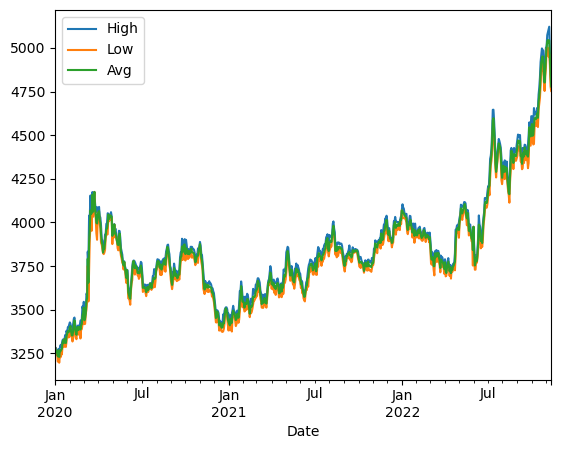

In [16]:
data[["High","Low","Avg"]].plot()

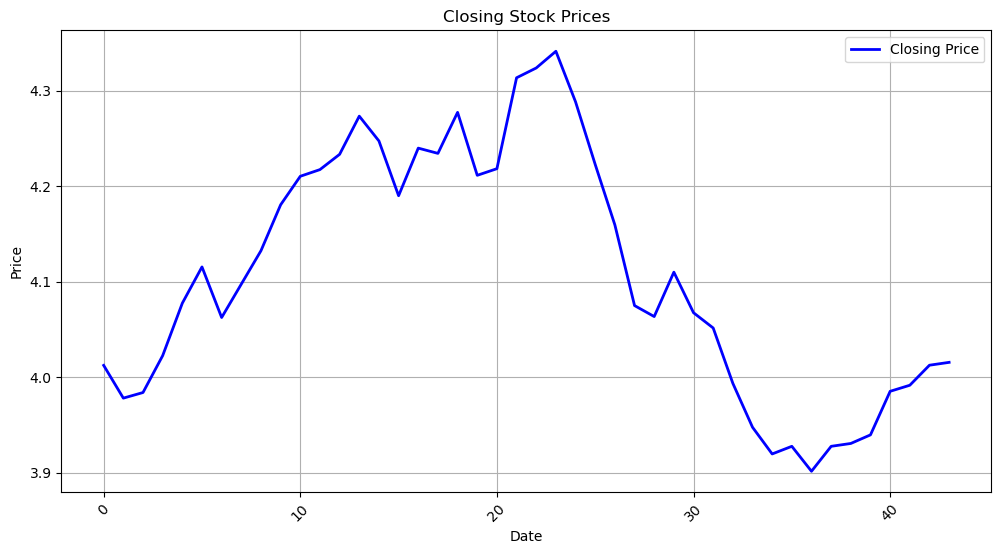

In [34]:
plt.figure(figsize=(12, 6)) 
plt.plot(data['Último'].T, label='Closing Price', color='blue', linewidth=2)

plt.title('Closing Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



In [35]:
data["Medio"].values
#stats.normaltest()

array([3.995665, 3.978   , 4.003085, 4.057195, 4.09775 , 4.08885 ,
       4.0525  , 4.112   , 4.1578  , 4.196305, 4.21525 , 4.22186 ,
       4.25375 , 4.26353 , 4.22251 , 4.21543 , 4.24038 , 4.24824 ,
       4.24875 , 4.221145, 4.2673  , 4.31511 , 4.335475, 4.3153  ,
       4.253   , 4.194675, 4.118585, 4.0685  , 4.084045, 4.089475,
       4.05949 , 4.01877 , 3.96502 , 3.929325, 3.916785, 3.911445,
       3.915675, 3.922965, 3.93944 , 3.95827 , 3.988075, 4.00333 ,
       4.01803 , 4.044275])